In [2]:
import os
os.getcwd()

'/home/andreas/Documents/SINTEF_code_review/cidemod/Checks/Thermal'

In [3]:
from cideMOD import (
    CellParser,
    Problem,
    SolverCrashed,
    Trigger,
    ModelOptions,
)

import numpy as np
import matplotlib.pyplot as plt

In [20]:
#Define Chen path
overwrite = True
case = "Xu_2015"
data_path = "../Data/data_{}".format(case)
params = "params.json"

C_rate = 1
#I_app = -5 #C_rate * problem.Q
t_f = 3600 /abs(C_rate)*1.25
v_min = Trigger(2.5, "v")

Define model options, we turn on thermal in 4D

In [21]:
i=10
model_options = ModelOptions(mode='P3D', solve_thermal=True, clean_on_exit=False,N_x=i,N_y=i,N_z=i)
cell = CellParser(params, data_path=data_path)

Capacidad Anodo: 0.10172665834785263
Capacidad Catodo: 0.1695044914659747
Capacidad Celda: 0.10172665834785263


Setup of the problem

In [49]:
problem= Problem(cell, model_options)
problem.set_cell_state(1, 273 + 25, 273 + 25)
problem.setup() #OBS Cylinder reads thr cylinder_3.xml file in the LOCAL repo
I_app=C_rate*problem.Q
print(problem.Q)

Building mesh for P2D problem with 5 components and 50 nodes.
Finished building mesh
Building problem setup
 - Build cell parameters - Done 
 - Initializing state - Done 
 - Build variational formulation - Done 
Problem Setup finished.
Problem has 226.0 dofs.

0.10172665834785263


In [50]:
tstop=Trigger(5000,"t")
status = problem.solve_ie(i_app=I_app,t_f=t_f, store_delay=10, adaptive=True, triggers=[v_min])

Solving ...
initializing solution
Voltage is 2.5 V at 3464.74 s 1	Time: 57min 44s



In [51]:
print(problem.WH.global_vars.keys())
len(problem.WH.global_var_arrays[0])

dict_keys(['voltage', 'current', 'capacity', 'temperature'])


6414

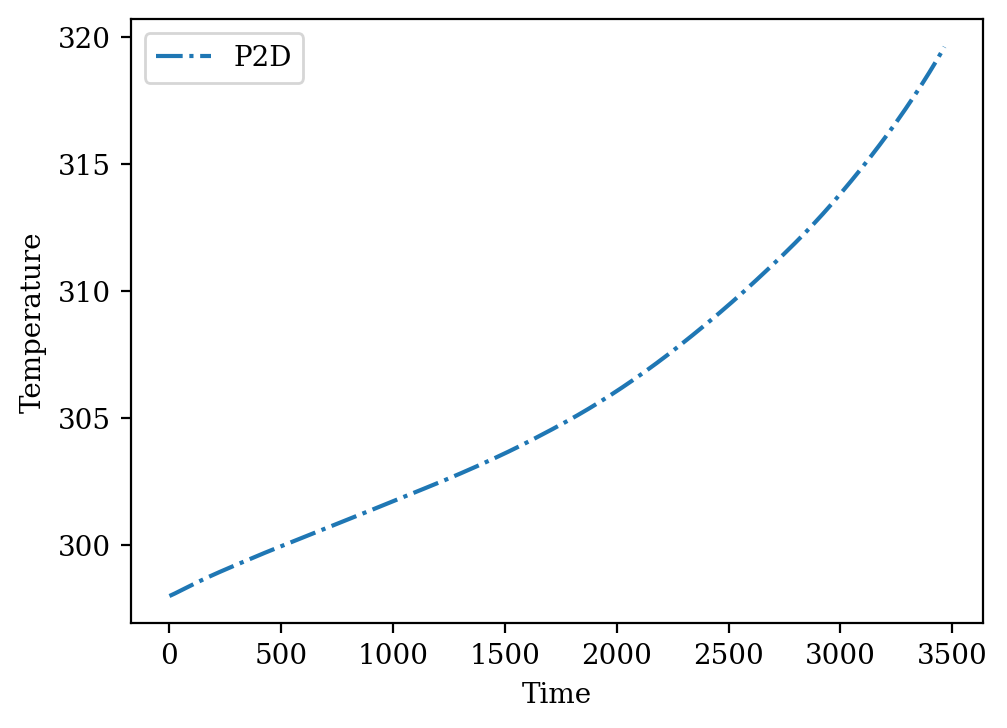

In [53]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=200)
# plot voltage vs tid
ax1.plot(problem.WH.global_var_arrays[0][0:len(problem.WH.global_var_arrays[0])], problem.WH.global_var_arrays[4], "-.")
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature")
ax1.legend(["P2D"], loc="best")

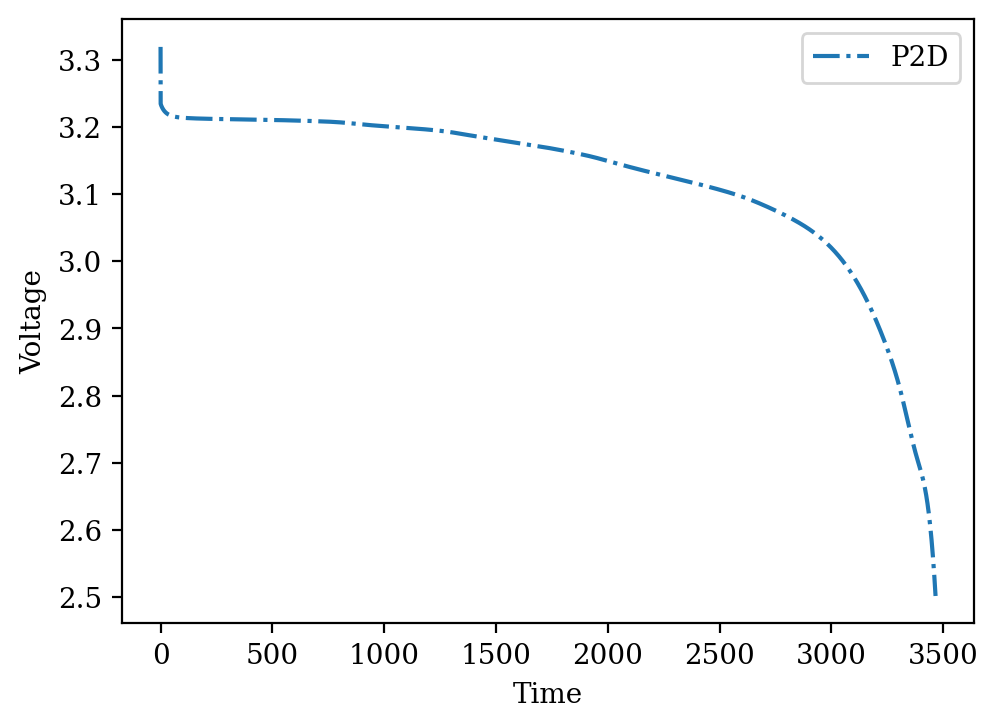

In [56]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=200)
# plot voltage vs tid
ax1.plot(problem.WH.global_var_arrays[0], problem.WH.global_var_arrays[1], "-.")
ax1.set_xlabel("Time")
ax1.set_ylabel("Voltage")
ax1.legend(["P2D"], loc="best")